## Importing required Library

In [ ]:
#importing required library
import numpy as np # numpy is a library that allows us to work with vectors and matrices
import matplotlib.pyplot as plt # visualisation library
import pandas as pd # pandas is a library that allows us to work with DataFrames
import seaborn as sea

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")


## Data Upload using google drive, to reduce upload time for each execution

In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# Read the CSV file into a DataFrame
train_dataset = pd.read_csv('/content/drive/MyDrive/AML/uk_road.csv')

# View the first few rows of the DataFrame
train_dataset.head()

Mounted at /content/drive


,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,2019010225080,30,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,serious
1,2019200908684,30,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,fatal
2,2019040860897,40,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,data missing or out of range,NaN,serious
3,2019460847205,40,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,NaN,serious
4,2019051911581,30,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,slight


##1 EDA
##1.1 Feature and Label annalysis using pandas



> Printing train_dataset size, Feature names and data types

> Checking for null values





In [ ]:
# Check the dimensions of the dataset
print("Number of rows:", train_dataset.shape[0])
print("Number of columns:", train_dataset.shape[1])

# Check the data types of the columns
print(train_dataset.dtypes)

# Check for missing values
print(train_dataset.isnull().sum())

# Check for class imbalance
#print(train_dataset['accident_severity'].value_counts().plot(kind='bar'))

# Visualize the data
#import matplotlib.pyplot as plt
#plt.hist(train_dataset['age_of_driver'], bins=20)
#plt.xlabel('Age of Driver')
#plt.ylabel('Frequency')
#plt.show()


Number of rows: 31647
Number of columns: 14
accident_index                  object
speed_limit                      int64
light_conditions                object
weather_conditions              object
road_surface_conditions         object
vehicle_type                    object
junction_location               object
skidding_and_overturning        object
vehicle_leaving_carriageway     object
hit_object_off_carriageway      object
first_point_of_impact           object
sex_of_driver                   object
age_of_oldest_driver           float64
accident_severity               object
dtype: object
accident_index                    0
speed_limit                       0
light_conditions                  0
weather_conditions                0
road_surface_conditions           0
vehicle_type                      0
junction_location                 0
skidding_and_overturning          0
vehicle_leaving_carriageway       0
hit_object_off_carriageway        0
first_point_of_impact             0


##1.2 Evaluating count for categorical values

In [ ]:
# let's list all categorical features
categorical_columns= ['light_conditions', 'weather_conditions', 'road_surface_conditions', 'vehicle_type',
       'junction_location', 'skidding_and_overturning','first_point_of_impact','sex_of_driver','accident_severity']

# let's get the categories and their count for each feature
for col in categorical_columns:
    print(f"Categories and number of occurrences for '{col}'")
    print(train_dataset[col].value_counts())
    print()

Categories and number of occurrences for 'light_conditions'
daylight    22210
darkness     9437
Name: light_conditions, dtype: int64

Categories and number of occurrences for 'weather_conditions'
fine                            25152
other                            5407
data missing or out of range      970
fog or mist                       118
Name: weather_conditions, dtype: int64

Categories and number of occurrences for 'road_surface_conditions'
dry                             22092
wet or damp                      8761
other                             374
data missing or out of range      365
flood over 3cm. deep               55
Name: road_surface_conditions, dtype: int64

Categories and number of occurrences for 'vehicle_type'
only cars                       17487
at least one biped               8662
at least one van                 4040
biped and van                    1000
other                             395
data missing or out of range       63
Name: vehicle_type, dtype:

In [ ]:
train_dataset.loc[train_dataset.accident_severity=='Slight','accident_severity'] = 'slight'
train_dataset.loc[train_dataset.accident_severity=='Fatal','accident_severity'] = 'fatal'
train_dataset.loc[train_dataset.accident_severity=='Serious','accident_severity'] = 'serious'

print(train_dataset['accident_severity'].value_counts())


slight     12691
serious    11617
fatal       6167
Name: accident_severity, dtype: int64


##1.3 Handelling Null values by dropping them

In [ ]:
# remove all rows with missing data
# dropna removes all rows that contain at least one missing value
print(f'Original dataset length: {len(train_dataset)}')
reduced_train_dataset = train_dataset.dropna()
reduced_train_dataset.dropna(inplace=True)
print(f'Dataset length after removing missing rows: {len(reduced_train_dataset)}')
train_dataset.head(5)

print("Number of rows:", reduced_train_dataset.shape[0])
print("Number of columns:", reduced_train_dataset.shape[1])

Original dataset length: 31647
Dataset length after removing missing rows: 24287
Number of rows: 24287
Number of columns: 14


##1.4 Analysing  Label value after dropping null

Axes(0.125,0.11;0.775x0.77)


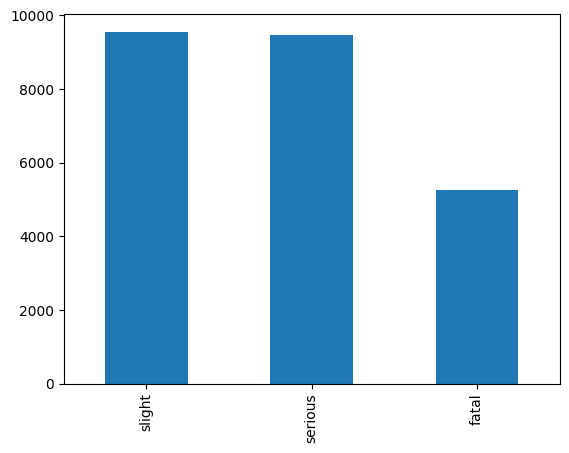

In [ ]:
print(reduced_train_dataset['accident_severity'].value_counts().plot(kind='bar'))

##1.5 Checking null values for confirmation

In [ ]:
print(reduced_train_dataset.isnull().sum())

accident_index                 0
speed_limit                    0
light_conditions               0
weather_conditions             0
road_surface_conditions        0
vehicle_type                   0
junction_location              0
skidding_and_overturning       0
vehicle_leaving_carriageway    0
hit_object_off_carriageway     0
first_point_of_impact          0
sex_of_driver                  0
age_of_oldest_driver           0
accident_severity              0
dtype: int64


##1.6 Statistical analysis of numerical column i.e. Speed and Age of driver

In [ ]:
print(reduced_train_dataset[['speed_limit', 'age_of_oldest_driver']].describe())

        speed_limit  age_of_oldest_driver
count  24287.000000          24287.000000
mean      37.841644             47.260963
std       14.307376             16.774969
min       -1.000000              6.000000
25%       30.000000             34.000000
50%       30.000000             47.000000
75%       50.000000             59.000000
max       70.000000            101.000000


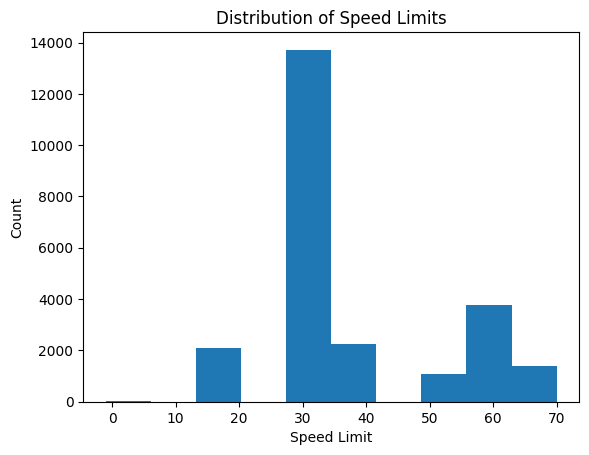

In [ ]:
import matplotlib.pyplot as plt

# Create a histogram of the speed_limit column
plt.hist(reduced_train_dataset['speed_limit'])
plt.xlabel('Speed Limit')
plt.ylabel('Count')
plt.title('Distribution of Speed Limits')
plt.show()

In [ ]:
# let's get the categories and their count for each feature
for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  print(reduced_train_dataset[col].value_counts())
  print()

Categories and number of occurrences for 'light_conditions'
daylight    17156
darkness     7131
Name: light_conditions, dtype: int64

Categories and number of occurrences for 'weather_conditions'
fine                            19496
other                            4218
data missing or out of range      473
fog or mist                       100
Name: weather_conditions, dtype: int64

Categories and number of occurrences for 'road_surface_conditions'
dry                             16729
wet or damp                      7077
other                             320
data missing or out of range      112
flood over 3cm. deep               49
Name: road_surface_conditions, dtype: int64

Categories and number of occurrences for 'vehicle_type'
only cars                       13527
at least one biped               6596
at least one van                 3139
biped and van                     738
other                             282
data missing or out of range        5
Name: vehicle_type, dtype:

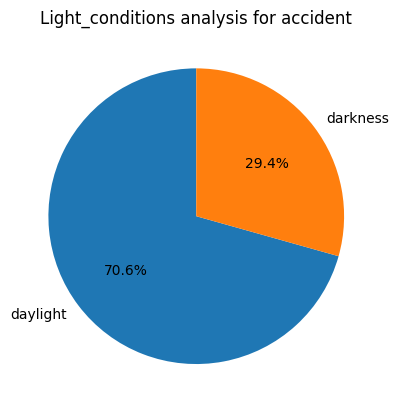

In [ ]:
#Performing a pie plot that shows distribution of label
counts = reduced_train_dataset['light_conditions'].value_counts()
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%',startangle=90)
plt.title('Light_conditions analysis for accident')
plt.show()

##2 Encoding for catgorical data

In [ ]:
# importing sklearn for encoding
from sklearn import preprocessing

#creating class for encoder
# using label encoder fuction
label_encoder = preprocessing.LabelEncoder()
## transforming into numerical variable
reduced_train_dataset['light_conditions']= label_encoder.fit_transform(reduced_train_dataset['light_conditions'])
reduced_train_dataset['weather_conditions']= label_encoder.fit_transform(reduced_train_dataset['weather_conditions']) ## transforming into numerical variable
reduced_train_dataset['road_surface_conditions']= label_encoder.fit_transform(reduced_train_dataset['road_surface_conditions']) ## transforming into numerical variable
reduced_train_dataset['accident_severity']= label_encoder.fit_transform(reduced_train_dataset['accident_severity']) ## transforming into numerical variable
reduced_train_dataset['vehicle_type']= label_encoder.fit_transform(reduced_train_dataset['vehicle_type']) ## transforming into numerical variable
reduced_train_dataset['junction_location']= label_encoder.fit_transform(reduced_train_dataset['junction_location']) ## transforming into numerical variable
reduced_train_dataset['skidding_and_overturning']= label_encoder.fit_transform(reduced_train_dataset['skidding_and_overturning']) ## transforming into numerical variable
reduced_train_dataset['vehicle_leaving_carriageway']= label_encoder.fit_transform(reduced_train_dataset['vehicle_leaving_carriageway']) ## transforming into numerical variable
reduced_train_dataset['hit_object_off_carriageway']= label_encoder.fit_transform(reduced_train_dataset['hit_object_off_carriageway']) ## transforming into numerical variable
reduced_train_dataset['first_point_of_impact']= label_encoder.fit_transform(reduced_train_dataset['first_point_of_impact']) ## transforming into numerical variable
reduced_train_dataset['sex_of_driver']= label_encoder.fit_transform(reduced_train_dataset['sex_of_driver']) ## transforming into numerical variable


In [ ]:
reduced_train_dataset.head()

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,2019010225080,30,0,3,4,1,0,2,2,2,3,1,63.0,1
1,2019200908684,30,0,1,1,4,0,2,0,0,0,1,82.0,0
4,2019051911581,30,1,1,1,4,2,2,2,2,0,0,39.0,2
6,2019420894599,30,0,1,4,4,2,2,2,2,0,1,40.0,0
7,2019010162791,50,1,1,1,4,0,2,2,2,0,1,57.0,2


In [ ]:
print(reduced_train_dataset.dtypes)

accident_index                  object
speed_limit                      int64
light_conditions                 int64
weather_conditions               int64
road_surface_conditions          int64
vehicle_type                     int64
junction_location                int64
skidding_and_overturning         int64
vehicle_leaving_carriageway      int64
hit_object_off_carriageway       int64
first_point_of_impact            int64
sex_of_driver                    int64
age_of_oldest_driver           float64
accident_severity                int64
dtype: object


In [ ]:
print(reduced_train_dataset.isnull().sum())

accident_index                 0
speed_limit                    0
light_conditions               0
weather_conditions             0
road_surface_conditions        0
vehicle_type                   0
junction_location              0
skidding_and_overturning       0
vehicle_leaving_carriageway    0
hit_object_off_carriageway     0
first_point_of_impact          0
sex_of_driver                  0
age_of_oldest_driver           0
accident_severity              0
dtype: int64


<Axes: xlabel='accident_severity', ylabel='count'>

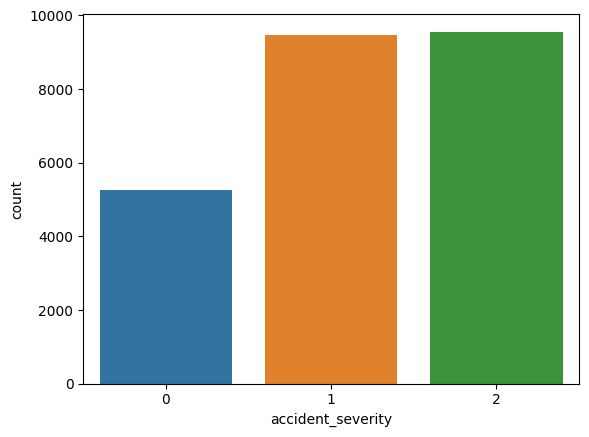

In [ ]:
sea.countplot(x='accident_severity', data=reduced_train_dataset)

In [ ]:
#Dropping unnecessary column
cols_drop=['accident_index']
reduced_train_dataset=reduced_train_dataset.drop(cols_drop,axis=1)

In [ ]:
reduced_train_dataset.head(10)

,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,30,0,3,4,1,0,2,2,2,3,1,63.0,1
1,30,0,1,1,4,0,2,0,0,0,1,82.0,0
4,30,1,1,1,4,2,2,2,2,0,0,39.0,2
6,30,0,1,4,4,2,2,2,2,0,1,40.0,0
7,50,1,1,1,4,0,2,2,2,0,1,57.0,2
8,60,1,1,1,1,0,2,2,2,0,1,57.0,0
9,60,1,1,1,4,2,2,0,0,0,3,60.0,0
10,30,1,3,4,1,0,2,2,2,0,1,46.0,2
11,30,1,1,1,1,2,0,0,0,0,1,47.0,0
12,60,1,1,1,0,2,2,2,2,0,1,45.0,1


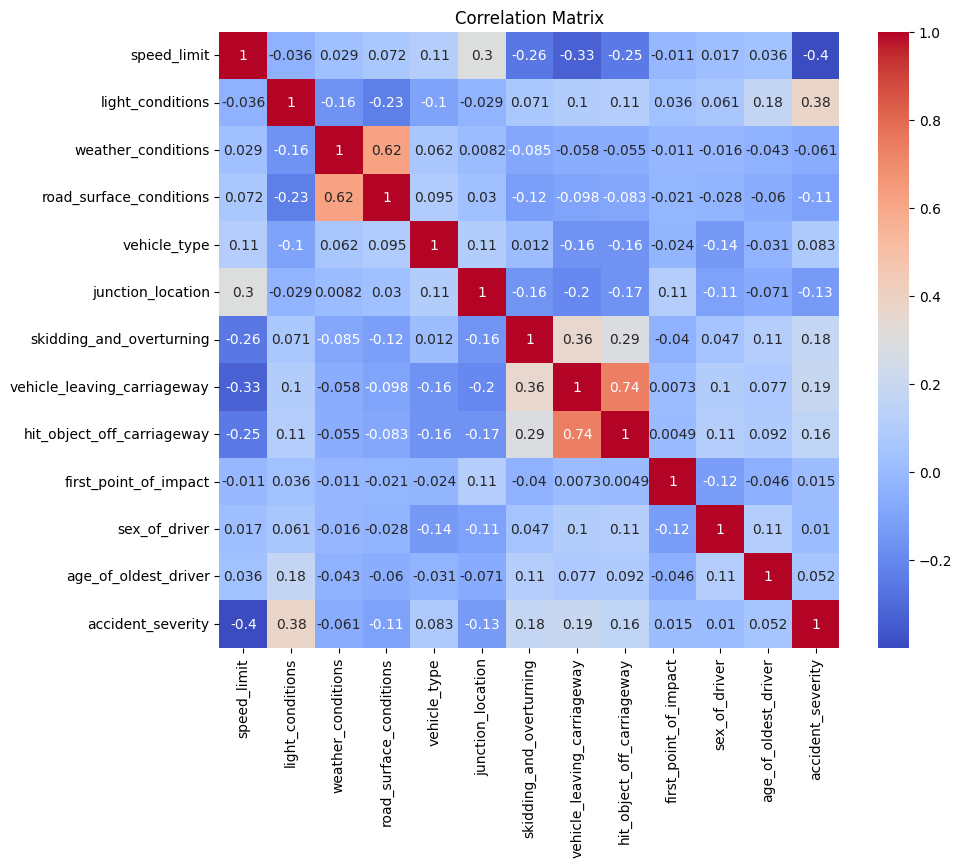

In [ ]:
corr_matrix = reduced_train_dataset.corr()
plt.figure(figsize=(10, 8))
sea.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
X = reduced_train_dataset.drop(["accident_severity"], axis=1)
Y = reduced_train_dataset["accident_severity"] ## separating independent and dependent variables


##3 Spliting dataset for training, testing usking sklearn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
## train test splitting
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3, random_state=0)

##4 Implementing ML algoritham for predicting accident severity



##4.1 Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
# Train a random forest classifier
rm = RandomForestClassifier(n_estimators=100, random_state=42)
rm.fit(X_train, Y_train)

# Evaluate the classifier on the test set
y_pred = rm.predict(X_test)

# Calculating the classifier accuracy
rm_accuracy = accuracy_score(Y_test, y_pred)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.69      0.67      1609
           1       0.72      0.72      0.72      2829
           2       0.77      0.74      0.75      2849

    accuracy                           0.72      7287
   macro avg       0.71      0.72      0.71      7287
weighted avg       0.72      0.72      0.72      7287

[[1118  297  194]
 [ 354 2026  449]
 [ 248  490 2111]]


##4.2 Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Creating a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

In [ ]:
# Training the following classifier on the particular training data
clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predicting the classes of the respecting testing data
y_pred = clf.predict(X_test)

In [ ]:
# Calculating the classifier accuracy
tree_accuracy = accuracy_score(Y_test, y_pred)

In [ ]:
# Printing the classifier accuracy
print("Accuracy:", tree_accuracy)

Accuracy: 0.6816248113078084


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Creating the following confusion matrix
cm = confusion_matrix(Y_test, y_pred)

In [ ]:
# Printing the respective confusion matrix
print(cm)

[[ 967  372  270]
 [ 344 2013  472]
 [ 242  620 1987]]


In [ ]:
from sklearn.metrics import f1_score

# Calculating the respective F1 score of the following classifier
f1_score = f1_score(Y_test, y_pred, average='weighted')

# Printing the respective F1 score of the following classifier
print("F1 score:", f1_score)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

F1 score: 0.6815073731949012
              precision    recall  f1-score   support

           0       0.62      0.60      0.61      1609
           1       0.67      0.71      0.69      2829
           2       0.73      0.70      0.71      2849

    accuracy                           0.68      7287
   macro avg       0.67      0.67      0.67      7287
weighted avg       0.68      0.68      0.68      7287

[[ 967  372  270]
 [ 344 2013  472]
 [ 242  620 1987]]


##4.3Dummy classifier

In [ ]:
from sklearn.dummy import DummyClassifier

# Creating a following dummy classifier that can predict the most frequent class
dummy = DummyClassifier(strategy='most_frequent')

# Training the respective dummy classifier on the following training data
dummy.fit(X_train, Y_train)

# Predicting the respective classes of the following testing data utilising the dummy classifier
y_pred_dummy = dummy.predict(X_test)

# Evaluating the specific accuracy of the following dummy classifier
accuracy_dummy = accuracy_score(Y_test, y_pred_dummy)

# Evaluating the specific accuracy of the following decision tree classifier
dummay_accuracy = accuracy_score(Y_test, y_pred)

# Printing the specific accuracy of the following dummy classifier and also the decision tree classifier
print("Accuracy of Dummy classifier :", accuracy_dummy)
print("Accuracy of Decision tree classifier :", tree_accuracy)

Accuracy of Dummy classifier : 0.3909702209414025
Accuracy of Decision tree classifier : 0.6816248113078084


##4.4 KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Splitting dataset into training and testing sets
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3, random_state=42)
# Creating KNN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Training the model on the training set
knn.fit(X_train, Y_train)

# Predicting the labels for testing set
Y_pred = knn.predict(X_test)

KNN_accuracy = accuracy_score(Y_test, y_pred)

# Printing the classification report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.58      0.59      0.58      1558
           1       0.67      0.69      0.68      2824
           2       0.71      0.67      0.69      2905

    accuracy                           0.66      7287
   macro avg       0.65      0.65      0.65      7287
weighted avg       0.67      0.66      0.66      7287



##5 Implementing NN approch to check performance of model

In [ ]:
import tensorflow as tf ## importing tensorflow
from tensorflow import keras

In [ ]:
model = keras.models.Sequential()
# Adding the input layer and first hidden layer
model.add(keras.layers.Dense(units=128, activation='relu', input_shape=X_train.shape))
# Adding the second hidden layer
model.add(keras.layers.Dense(units=64, activation='relu'))
# Adding the third hidden layer
model.add(keras.layers.Dense(units=32, activation='relu'))
# Adding the Fourth hidden layer
model.add(keras.layers.Dense(units=16, activation='relu'))
# Adding the fifth hidden layer
model.add(keras.layers.Dense(units=8, activation='relu'))
# Adding the six  hidden layer
model.add(keras.layers.Dense(units=4, activation='relu'))
# Adding the seven layer
model.add(keras.layers.Dense(units=1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from sklearn.neural_network import MLPClassifier # importing MLPclassifier
# Train an ANN classifier with 5 hidden layers
clf = MLPClassifier(hidden_layer_sizes=(5, 5, 5))
clf.fit(X_train, Y_train) ##fitting the model
# Predicting on the test set
y_pred = clf.predict(X_test)

# Calculating accuracy
neural_accuracy = accuracy_score(Y_test, y_pred)

print("Accuracy of Neural network:", neural_accuracy) ## accuracy of neural network

Accuracy of Neural network: 0.7421435432962811


In [ ]:
comparison = pd.DataFrame({'Model': ['Decision Tree Classifier',
                                    'Dummy Classifier',
                                   'Neural Network','Random Forest'], # setting all of the models
                        'Accuracy': [tree_accuracy*100, accuracy_dummy*100, #selecting the accuracy rat
                                     neural_accuracy*100,rm_accuracy*100]})
comparison.sort_values(by='Accuracy', ascending=False) #comparison among the accuracy rate

,Model,Accuracy
2,Neural Network,74.214354
3,Random Forest,72.114725
0,Decision Tree Classifier,68.162481
1,Dummy Classifier,39.097022
